# Text Mining - LGBT Tweets

### <font color="blue">A. Setting Library</font>

Langkah pertama adalah melakukan import untuk library yang dibutuhkan.

- pandas: Library untuk analisis dan manipulasi data dalam bentuk tabel (DataFrame).
- re: Library untuk pemrosesan teks dengan ekspresi reguler.
- nltk (Natural Language Toolkit): Library untuk pemrosesan bahasa alami (Natural Language Processing - NLP) yang menyediakan alat dan sumber daya untuk analisis dan pemrosesan teks dalam bahasa manusia.
- deep_translator: Library untuk terjemahan teks menggunakan layanan Google Translate.
- tqdm: Library untuk membuat tampilan progress bar dalam pengolahan data.
- transformers: Library dari Hugging Face untuk bekerja dengan model bahasa alami dan pemrosesan teks.
- numpy: Library untuk komputasi numerik dalam Python.
- scipy.special: Bagian dari SciPy yang berisi fungsi khusus, seperti softmax.
- csv: Library standar Python untuk membaca dan menulis file CSV.
- urllib.request: Library untuk mengakses dan mengunduh data dari URL.

In [17]:
import pandas as pd
import re
import nltk
from deep_translator import GoogleTranslator
from tqdm import tqdm
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
import matplotlib.pyplot as plt

### <font color="blue">B. Import Dataframe</font>

Dataset yang digunakan adalah dataset tweet mengenai LGBT yang dikumpulkan pada bulan Agustus 2022. Dataset ini diupload oleh salah satu pengguna Kaggle dengan tujuan data ini bisa digunakan untuk menganalisis bagaimana orang di media sosial memandang komunitas LGBT dan mendapatkan insight dari perspektif orang-orang tersebut.

Link dataset: <https://www.kaggle.com/datasets/vencerlanz09/lgbt-tweets>

In [18]:
lgbt_df = pd.read_csv('lgbt.csv', index_col= False)
lgbt_df

,Unnamed: 0,date,time,id,tweet,language,replies_count,retweets_count,likes_count
0,0,2022-08-26,10:31:10,1562991009180827649,Praying for my lgbt Nigerians 🙏🏽🙏🏽🙏🏽,en,0,0,0
1,1,2022-08-26,10:31:02,1562990976939229184,@yanmisamm So pass agg omg you really are lgbt,en,0,0,0
2,3,2022-08-26,10:30:59,1562990965442326528,@ChampionExcel @watokohom @MrAndyNgo @football...,en,0,0,0
3,7,2022-08-26,10:30:34,1562990860928659457,To be clear it doesn't justify what the LGBT c...,en,0,0,0
4,10,2022-08-26,10:30:24,1562990819485032449,good night lgbt community https://t.co/0PAMOU...,en,1,0,2
...,...,...,...,...,...,...,...,...,...
32451,99995,2022-08-21,00:09:11,1561022541833068545,@i664k @birdofterror4 @st1mmer @cringepolitik ...,en,0,1,1
32452,99997,2022-08-21,00:09:06,1561022522933616642,@Comrade4568 I`m anti-trans and anti-lgbt,en,1,0,1
32453,100009,2022-08-21,00:07:52,1561022211405881344,#Lgbt #lgbtq #lgbtqiaplus #lgbtqcommunity #lgb...,en,0,0,0
32454,100010,2022-08-21,00:07:50,1561022206167187456,Man its no fucking wonder why it's so hard for...,en,1,0,0


Menghilangkan kolom `Unnamed: 0` yang tidak diperlukan.

In [19]:
lgbt_df = lgbt_df.drop('Unnamed: 0', axis=1)
lgbt_df

,date,time,id,tweet,language,replies_count,retweets_count,likes_count
0,2022-08-26,10:31:10,1562991009180827649,Praying for my lgbt Nigerians 🙏🏽🙏🏽🙏🏽,en,0,0,0
1,2022-08-26,10:31:02,1562990976939229184,@yanmisamm So pass agg omg you really are lgbt,en,0,0,0
2,2022-08-26,10:30:59,1562990965442326528,@ChampionExcel @watokohom @MrAndyNgo @football...,en,0,0,0
3,2022-08-26,10:30:34,1562990860928659457,To be clear it doesn't justify what the LGBT c...,en,0,0,0
4,2022-08-26,10:30:24,1562990819485032449,good night lgbt community https://t.co/0PAMOU...,en,1,0,2
...,...,...,...,...,...,...,...,...
32451,2022-08-21,00:09:11,1561022541833068545,@i664k @birdofterror4 @st1mmer @cringepolitik ...,en,0,1,1
32452,2022-08-21,00:09:06,1561022522933616642,@Comrade4568 I`m anti-trans and anti-lgbt,en,1,0,1
32453,2022-08-21,00:07:52,1561022211405881344,#Lgbt #lgbtq #lgbtqiaplus #lgbtqcommunity #lgb...,en,0,0,0
32454,2022-08-21,00:07:50,1561022206167187456,Man its no fucking wonder why it's so hard for...,en,1,0,0


#### Feature selection

Karena hanya berfokus pada teks, maka dataframe yang didapatkan bisa disederhanakan menggunakan kode di bawah. Hal ini bertujuan untuk menyederhanakan dataset dan mengeliminasi atribut yang tidak akan dianalisis.

In [20]:
lgbt_text_df = lgbt_df[['tweet']]
lgbt_text_df

,tweet
0,Praying for my lgbt Nigerians 🙏🏽🙏🏽🙏🏽
1,@yanmisamm So pass agg omg you really are lgbt
2,@ChampionExcel @watokohom @MrAndyNgo @football...
3,To be clear it doesn't justify what the LGBT c...
4,good night lgbt community https://t.co/0PAMOU...
...,...
32451,@i664k @birdofterror4 @st1mmer @cringepolitik ...
32452,@Comrade4568 I`m anti-trans and anti-lgbt
32453,#Lgbt #lgbtq #lgbtqiaplus #lgbtqcommunity #lgb...
32454,Man its no fucking wonder why it's so hard for...


Kode di bawah memiliki tujuan untuk melakukan random sampling (pengambilan sampel acak) dari DataFrame covid_simple_df, yang awalnya memiliki sekitar 32,000 baris data, dengan alasan untuk mengambil sebagian kecil (sekitar 20%) dari data tersebut. Penjelasan langkah-langkahnya:

- `random_seed = 42`: Ini adalah pengaturan biji acak (random seed) dengan nilai 42. Menetapkan biji acak ini memastikan bahwa hasil random sampling akan konsisten jika kode dieksekusi ulang. Dengan kata lain, pengaturan biji acak ini membuat hasil yang dapat direproduksi.
- `sample_size = int(0.20 * len(covid_simple_df))`: Ini adalah langkah perhitungan untuk menentukan ukuran sampel yang diinginkan. Dalam hal ini, sekitar 20% dari total jumlah baris dalam covid_simple_df akan diambil. Hasil dari perhitungan ini disimpan dalam variabel sample_size.
- `random_sample = covid_simple_df.sample(n=sample_size, random_state=random_seed)`: Ini adalah langkah yang sebenarnya untuk melakukan random sampling. Fungsi `.sample()` digunakan untuk mengambil sampel acak dari DataFrame `covid_simple_df`. Parameter n digunakan untuk menentukan jumlah sampel yang diambil, yang diambil dari nilai sample_size yang telah dihitung sebelumnya. Parameter random_state diatur dengan biji acak yang telah ditentukan sebelumnya (42) untuk memastikan hasil yang konsisten. Hasil random sampling disimpan dalam DataFrame random_sample.

Alasan untuk melakukan random sampling adalah untuk mengambil sejumlah kecil data yang merupakan subset representatif dari data awal yang lebih besar. Ini sering digunakan dalam analisis data untuk mengurangi waktu komputasi dan sumber daya yang dibutuhkan saat bekerja dengan data yang besar. Dalam kasus ini, kita mengambil sekitar 20% data secara acak sebagai contoh yang lebih kecil untuk analisis lebih lanjut.

In [21]:
random_seed = 42
sample_size = int(0.20 * len(lgbt_text_df))
random_sample = lgbt_text_df.sample(n=sample_size, random_state=random_seed)
random_sample

,tweet
8049,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...
2383,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...
13367,@moosie5030 @BoogerLeader @stalocksuperfan @Re...
1247,PHANTOMS AND FALLING STARS: A marooned captain...
18418,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...
...,...
476,@island_xd Sounds like meme culture but lgbt p...
14136,the holidays are truly my favorite time of yea...
10226,I'm praying to The Flying Spaghetti Monster th...
11943,@Tiernanbrady @ionainstitute They literally op...


Melakukan reset index untuk merapikan dataframe.

In [22]:
final_lgbt_df = random_sample.reset_index(drop = True)
final_lgbt_df

,tweet
0,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...
1,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...
2,@moosie5030 @BoogerLeader @stalocksuperfan @Re...
3,PHANTOMS AND FALLING STARS: A marooned captain...
4,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...
...,...
6486,@island_xd Sounds like meme culture but lgbt p...
6487,the holidays are truly my favorite time of yea...
6488,I'm praying to The Flying Spaghetti Monster th...
6489,@Tiernanbrady @ionainstitute They literally op...


### <font color="blue">C. Text Preprocessing</font>

#### 1. Text Cleaning

Kode di bawah digunakan untuk mengunduh daftar kata-kata berhenti (stop words) dalam bahasa Inggris menggunakan library nltk dan menyimpannya dalam variabel en_stopwords, yang nantinya dapat digunakan untuk menghapus kata-kata umum yang tidak memiliki nilai penting dalam pemrosesan teks.

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define a set of stopwords
en_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Kode di bawah adalah sebuah fungsi Python yang melakukan pra-pemrosesan (preprocessing) pada teks tweet. Fungsi ini melakukan langkah-langkah berikut:

- Menggantikan karakter newline ('\n') dengan spasi kosong untuk menghapus baris baru.
- Memisahkan teks menjadi token-token (kata-kata) dengan menggunakan spasi sebagai pemisah.
- Menghapus kata-kata yang dimulai dengan karakter '@' (menghapus username).
- Menghapus kata-kata yang dimulai dengan karakter '#' (menghapus hashtag).
- Menghapus kata-kata yang dimulai dengan 'http' atau 'www.' (menghapus URL).
- Menggantikan karakter '/' dengan spasi kosong.
- Menghilangkan spasi ekstra di antara kata-kata.
- Mengembalikan teks yang telah dipreproses.

Dengan demikian, fungsi ini membersihkan teks tweet dari elemen-elemen yang umumnya tidak relevan atau diinginkan dalam analisis teks, seperti karakter newline, username, hashtag, dan URL.

In [24]:
def preprocess_tweet(text):
    text = text.replace('\n', ' ')  # Remove every '\n'
    # text = text.replace('rt', ' ')  # Remove every retweet symbol
    tokens = text.split()
    # Remove usernames
    tokens = [token if not token.startswith('@') else ' ' for token in tokens]
    # Remove hashtags
    tokens = [token if not token.startswith('#') else ' ' for token in tokens]
    # Remove URLs
    tokens = [token if not token.startswith('http') and not token.startswith('www.') else ' ' for token in tokens]
    text = ' '.join(tokens)
    text = text.replace('/', ' ')
    text = ' '.join(text.split())  # Remove extra spaces
    return text

Kode di bawah adalah sebuah fungsi Python yang bertujuan untuk membersihkan teks dengan cara menghapus karakter-karakter non-alphanumeric (selain huruf dan angka) kecuali tanda titik (.) dan tanda koma (,). Fungsi ini melakukan langkah-langkah berikut:

- Menggantikan karakter '&amp;' dengan spasi kosong.
- Memisahkan teks menjadi token-token (kata-kata) dengan menggunakan spasi sebagai pemisah.
- Menghapus karakter non-alphanumeric kecuali tanda titik (.) dan tanda koma (,).
- Menggantikan spasi ekstra di antara kata-kata dengan satu spasi.
- Mengembalikan teks yang telah dipreproses.

Dengan demikian, fungsi ini membersihkan teks dari karakter-karakter khusus yang tidak relevan dalam analisis teks, kecuali tanda titik dan tanda koma yang sering digunakan dalam teks bahasa alami.

In [25]:
def remove_nonaplhanumeric(text):
    text = text.replace('&amp;', ' ')
    # Remove non-alphanumeric characters except for ., and !
    tokens = text.split()
    tokens = [token if token.isalnum() or token in ['.', ','] else ' ' for token in tokens]
    text = ' '.join(tokens)
    text = ' '.join(text.split())  # Remove extra spaces
    return text

Kode di bawah adalah sebuah fungsi Python yang melakukan beberapa tahap pra-pemrosesan pada teks. Fungsi ini melakukan langkah-langkah berikut:

- Menggantikan tanda titik (.), tanda koma (,), dan tanda seru (!) dengan spasi kosong, sehingga karakter-karakter ini dihapus dari teks.
- Memisahkan teks menjadi token-token (kata-kata) dengan menggunakan spasi sebagai pemisah.
- Menghapus kata-kata berhenti (stopwords) dalam bahasa Inggris (menggunakan en_stopwords) dari teks. Kata-kata berhenti adalah kata-kata umum yang seringkali tidak memiliki nilai penting dalam analisis teks.
- Menggantikan kata-kata yang telah dihapus dengan spasi kosong.
- Menghapus spasi atau baris baru yang mungkin ada di awal atau akhir teks.
- Mengembalikan teks yang telah dipreproses.

Dengan langkah-langkah ini, fungsi tersebut membersihkan teks dari karakter khusus dan kata-kata berhenti dalam bahasa Inggris, serta mengonversi teks ke format huruf kapital yang konsisten.

In [26]:
def remove_stopword(text):
    text = text.replace('.', '').replace(',', '').replace('!', '')  # Remove ., and !
    tokens = text.split()
    # Remove stopwords
    tokens = ['' if token in en_stopwords else token for token in tokens]
    text = ' '.join(tokens)
    text = text.strip()  # Remove leading/trailing spaces or newlines
    return text

Kode di bawah adalah sebuah fungsi Python yang bertujuan untuk menghapus spasi ganda dalam teks. Fungsi ini menggunakan ekspresi reguler (re.sub()) untuk mencari dan menggantikan setiap kemunculan spasi ganda atau lebih dengan satu spasi tunggal. Hasilnya adalah teks yang tidak mengandung spasi berlebihan di antara kata-kata atau karakter-karakter.

In [27]:
def remove_doublespace(text):
    text = re.sub(r'\s+', ' ', text)
    return text

Kode di bawah adalah sebuah fungsi preprocess yang merupakan gabungan dari fungsi-fungsi sebelumnya. Ini melibatkan beberapa tahap:

- `text.lower()`: Fungsi ini mengonversi semua huruf dalam teks menjadi huruf kecil untuk konsistensi.
- `preprocess_tweet(text)`: Memanggil fungsi preprocess_tweet untuk membersihkan teks dari elemen-elemen seperti retweet symbol, username, hashtag, dan URL.
- `remove_nonaplhanumeric(text)`: Memanggil fungsi remove_nonaplhanumeric untuk menghapus karakter-karakter non-alphanumeric kecuali tanda titik dan tanda koma.
- `remove_doublespace(text)`: Memanggil fungsi remove_doublespace untuk menghapus spasi ganda di antara kata-kata atau karakter-karakter.

In [28]:
def preprocess(text):
    text = text.lower() # Mengecilkan semua hurufnya dahulu agar lebih mudah
    text = preprocess_tweet(text)
    text = remove_nonaplhanumeric(text)
    text = remove_doublespace(text)
    return text

#### 2. Handling Slang Words (Kata Gaul dan Singkatan)

Slang words merupakan singkatan/kata-kata/tanda yang sering digunakan untuk mengekspresikan sesuatu secara singkat. Hal ini perlu diatasi dalam salah satu proses pembersihan teks agar teks dapat dianalisis secara lebih lanjut. Di sini, digunakan slangs.csv yang merupakan file kumpulan slang words dalam bahasa Inggris. File ini didapatkan dari link GitHub berikut <https://github.com/bodhwani/NLP-VIT-BOT/blob/master/slangs.csv>.

In [29]:
slang = pd.read_csv('slangs.csv', index_col=0, encoding='latin-1', header=1)
slang

,Slag,Meaning
0,,
1,#1,Number one
2,$,Dollar
3,$_$,Has money
4,%),Drunk
5,&,And
...,...,...
7652,|O|,LOL
7653,}:-),Devilish smile
7654,~,Denotes Sarcasm


Melakukan penggantian nama kolom pada dataframe slang words.

In [30]:
slang['Slag'] = slang['Slag'].str.lower()
slang = slang.rename(columns={'Slag': 'original', 
                                      'Meaning': 'replacement'})
slang = slang.reset_index(drop=True)
slang

,original,replacement
0,#1,Number one
1,$,Dollar
2,$_$,Has money
3,%),Drunk
4,&,And
...,...,...
7651,|o|,LOL
7652,}:-),Devilish smile
7653,~,Denotes Sarcasm
7654,â®,Registered Trademark Symbol


Kode di bawah berfungsi untuk mengecek dataframe slang words pada baris ke 7090-7094 dan ditemukan satu kata yang perlu dihilangkan, yaitu "we" karena kata ini juga memiliki arti lain dalam bahasa Inggris.

In [31]:
slang[7090:7095]

,original,replacement
7090,wdywtta,What Do You Want To Talk About
7091,we,Whatever
7092,web,World wide web
7093,weba,Welcome Back
7094,webinar,Web based seminar


In [32]:
slang.drop(7091, inplace=True)
slang = slang[slang['original'] != 'sick']
slang = slang.reset_index(drop=True)
slang

,original,replacement
0,#1,Number one
1,$,Dollar
2,$_$,Has money
3,%),Drunk
4,&,And
...,...,...
7649,|o|,LOL
7650,}:-),Devilish smile
7651,~,Denotes Sarcasm
7652,â®,Registered Trademark Symbol


Kode di bawah berhubungan dengan normalisasi teks yang mungkin mengandung kata-kata slang atau singkatan yang perlu diubah menjadi bentuk standar.

- `slang_map` adalah sebuah dictionary yang dibuat dengan memasangkan kata-kata slang asli dengan kata-kata penggantinya. Ini dilakukan dengan menggunakan fungsi zip untuk menggabungkan dua kolom dari sebuah DataFrame (dalam hal ini, `slang['original']` adalah kata-kata slang asli dan `slang['replacement']` adalah kata-kata penggantinya).
- `normalize_slang(text)` adalah sebuah fungsi yang menerima teks sebagai input. Fungsi ini memisahkan teks menjadi kata-kata individual, dan jika sebuah kata termasuk dalam slang_map, maka kata tersebut akan diganti dengan kata pengganti yang sesuai. Jika kata tersebut tidak ada dalam slang_map, maka kata tersebut tetap dipertahankan.

In [33]:
slang_map = dict(zip(slang['original'], slang['replacement']))

def normalize_slang(text):
    return ' '.join([slang_map[word] if word in slang_map else word for word in text.split(' ')])

### 3. Text Stemming

Stemming adalah proses dalam pemrosesan teks yang bertujuan untuk menghilangkan infleksi kata atau akhiran kata sehingga hanya sisa akar (root) dari kata tersebut. Misalnya, kata-kata seperti "running," "runner," dan "ran" akan diubah menjadi akar kata "run."

Penjelasan kode di bawah ini mengenai stemming:
- `nltk.download('punkt')`: Ini adalah perintah yang digunakan untuk mengunduh sumber daya yang diperlukan oleh NLTK, termasuk tokenisasi (menguraikan teks menjadi kata-kata) untuk pemrosesan teks.
- `def stem_text(text)`: Ini adalah deklarasi fungsi yang menerima teks sebagai input dan akan mengembalikan teks yang sudah di-stem.
- `stemmer = PorterStemmer()`: Ini inisialisasi stemmer Porter dari library NLTK.
- `words = nltk.word_tokenize(text)`: Ini mengurai teks menjadi kata-kata individu menggunakan tokenisasi NLTK.
- `stemmed_words = [stemmer.stem(word) for word in words]`: Ini melakukan stemming pada setiap kata dalam teks menggunakan stemmer Porter. Hasilnya adalah daftar kata-kata yang sudah di-stem.
- `stemmed_text = ' '.join(stemmed_words)`: Ini menggabungkan kata-kata yang sudah di-stem kembali menjadi satu teks dengan spasi sebagai pemisah.
- `return stemmed_text`: Fungsi mengembalikan teks yang sudah di-stem.

In [34]:
nltk.download('punkt')
from nltk.stem import PorterStemmer

def stem_text(text):
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### <font color="blue">D. Perform Text Preprocessing</font>

#### 1. Preprocess Awal

Kode di bawah digunakan untuk membersihkan dan memproses teks pada kolom "tweet" dalam sebuah DataFrame (dalam kasus ini final_lgbt_df) dan menyimpan hasilnya dalam kolom baru yang disebut "tweet_clean." 

In [35]:
final_lgbt_df["tweet_clean"] = final_lgbt_df["tweet"].apply(preprocess)
final_lgbt_df

,tweet,tweet_clean
0,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...,ireland global project against extremism and h...
1,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...,rapunzel veronica mars surviving her murder 10...
2,@moosie5030 @BoogerLeader @stalocksuperfan @Re...,i totally agree with should not be talking or ...
3,PHANTOMS AND FALLING STARS: A marooned captain...,phantoms and falling a marooned a tribal and a...
4,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...,how about constitutional the right to not have...
...,...,...
6486,@island_xd Sounds like meme culture but lgbt p...,sounds like meme culture but lgbt ppl like me ...
6487,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...
6488,I'm praying to The Flying Spaghetti Monster th...,praying to the flying spaghetti monster that s...
6489,@Tiernanbrady @ionainstitute They literally op...,they literally oppose equal rights for people ...


#### 2. Pembersihan Slang Words

Kode di bawah digunakan untuk melakukan penghapusan kata slang (istilah atau frasa yang tidak formal atau non-standar) dalam teks dan mengonversi teks ke huruf kecil pada DataFrame random_sample. Berikut penjelasan lebih detail:

`final_lgbt_df['tweet_no_slang'] = final_lgbt_df['tweet_clean'].apply(normalize_slang)`: Ini adalah langkah pertama yang menghasilkan kolom baru dengan nama "tweet_no_slang." Penjelasan lebih rinci:

- `final_lgbt_df['tweet_clean']` adalah kolom "tweet_clean" dalam DataFrame random_sample, yang berisi teks yang telah di-preproses.
- `.apply(normalize_slang)` adalah metode yang diterapkan pada setiap elemen dalam kolom "tweet_clean." Fungsi normalize_slang digunakan untuk menggantikan kata slang dalam teks. Hasilnya adalah teks yang telah dibersihkan dari kata-kata slang.

In [36]:
final_lgbt_df['tweet_no_slang'] = final_lgbt_df['tweet_clean'].apply(normalize_slang)
final_lgbt_df['tweet_no_slang'] = final_lgbt_df['tweet_no_slang'].str.lower()
final_lgbt_df

,tweet,tweet_clean,tweet_no_slang
0,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...,ireland global project against extremism and h...,ireland global hood against extremism and hate...
1,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving her murder 10...
2,@moosie5030 @BoogerLeader @stalocksuperfan @Re...,i totally agree with should not be talking or ...,i totally agree with should not be talking or ...
3,PHANTOMS AND FALLING STARS: A marooned captain...,phantoms and falling a marooned a tribal and a...,phantoms and falling a marooned a tribal and a...
4,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...,how about constitutional the right to not have...,how about constitutional the right to not have...
...,...,...,...
6486,@island_xd Sounds like meme culture but lgbt p...,sounds like meme culture but lgbt ppl like me ...,sounds like an idea that spreads like a virus ...
6487,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...
6488,I'm praying to The Flying Spaghetti Monster th...,praying to the flying spaghetti monster that s...,praying to the flying spaghetti monster that s...
6489,@Tiernanbrady @ionainstitute They literally op...,they literally oppose equal rights for people ...,they literally oppose equal rights for people ...


#### 3. Pembersihan Stop Words

Kode di bawah digunakan untuk menghapus stop words (kata-kata umum yang sering tidak memberikan makna signifikan dalam analisis teks) dari teks dalam DataFrame random_sample. Berikut penjelasan lebih detail:

- `final_lgbt_df['tweet_no_stopwords'] = final_lgbt_df['tweet_clean'].apply(remove_stopword)`: Ini adalah langkah pertama yang menghasilkan kolom baru dengan nama "tweet_no_stopwords." Penjelasan lebih rinci:
- `final_lgbt_df['tweet_clean']` adalah kolom "tweet_clean" dalam DataFrame random_sample, yang berisi teks yang telah di-preproses.
- `.apply(remove_stopword)` adalah metode yang diterapkan pada setiap elemen dalam kolom "tweet_clean." Fungsi remove_stopword digunakan untuk menghapus stop words dari teks. Hasilnya adalah teks yang telah dibersihkan dari kata-kata stop words.

In [37]:
final_lgbt_df['tweet_no_stopwords'] = final_lgbt_df['tweet_clean'].apply(remove_stopword)
final_lgbt_df['tweet_no_stopwords'] = final_lgbt_df['tweet_no_stopwords'].str.lower()
final_lgbt_df

,tweet,tweet_clean,tweet_no_slang,tweet_no_stopwords
0,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...,ireland global project against extremism and h...,ireland global hood against extremism and hate...,ireland global project extremism hate desig...
1,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving murder 10 ye...
2,@moosie5030 @BoogerLeader @stalocksuperfan @Re...,i totally agree with should not be talking or ...,i totally agree with should not be talking or ...,totally agree talking recommending anythi...
3,PHANTOMS AND FALLING STARS: A marooned captain...,phantoms and falling a marooned a tribal and a...,phantoms and falling a marooned a tribal and a...,phantoms falling marooned tribal wildling...
4,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...,how about constitutional the right to not have...,how about constitutional the right to not have...,constitutional right fbi come house w ...
...,...,...,...,...
6486,@island_xd Sounds like meme culture but lgbt p...,sounds like meme culture but lgbt ppl like me ...,sounds like an idea that spreads like a virus ...,sounds like meme culture lgbt ppl like use l...
6487,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,holidays truly favorite time year many re...
6488,I'm praying to The Flying Spaghetti Monster th...,praying to the flying spaghetti monster that s...,praying to the flying spaghetti monster that s...,praying flying spaghetti monster someday l...
6489,@Tiernanbrady @ionainstitute They literally op...,they literally oppose equal rights for people ...,they literally oppose equal rights for people ...,literally oppose equal rights people irratio...


#### 4. Melakukan Text Stemming

Kode di bawah digunakan untuk melakukan stemming (penghilangan imbuhan kata) pada teks dalam kolom "tweet_no_stopwords" dari DataFrame random_sample. Selain itu, kode ini juga mengonversi hasil stemming ke huruf kecil dan menggunakan tqdm untuk melacak kemajuan proses. Berikut penjelasan lebih rinci:

1. `tqdm.pandas(total=len(final_lgbt_df))`: Ini adalah inisialisasi tqdm dengan jumlah total elemen yang akan diproses. Dalam hal ini, kita mengatur jumlah total elemen menjadi jumlah baris dalam DataFrame final_lgbt_df, sehingga kita dapat melacak kemajuan proses saat melakukan stemming pada setiap elemen.
2. `final_lgbt_df['tweet_stemmed'] = final_lgbt_df['tweet_no_stopwords'].progress_apply(lambda text: stem_text(text).lower())`: Ini adalah baris kode yang melakukan operasi stemming pada teks dan mengonversi hasil stemming ke huruf kecil. Penjelasan lebih rinci:
    - `.progress_apply()` adalah metode dari pandas yang digunakan untuk menerapkan fungsi pada setiap elemen dalam kolom `"tweet_no_stopwords"` dari DataFrame random_sample sambil melacak kemajuan proses menggunakan tqdm.
    - `lambda text: stem_text(text).lower()` adalah fungsi lambda yang melakukan stemming pada teks menggunakan fungsi stem_text, yang menghilangkan imbuhan kata, dan kemudian mengonversi hasil stemming ke huruf kecil. Ini digunakan untuk setiap elemen dalam kolom `"tweet_no_stopwords"`.
3. `tqdm._instances.clear()`: Ini adalah langkah yang diperlukan untuk membersihkan semua instance tqdm dan menutup baris kemajuan setelah proses selesai.

In [38]:
tqdm.pandas(total=len(final_lgbt_df))
final_lgbt_df['tweet_stemmed'] = final_lgbt_df['tweet_no_stopwords'].progress_apply(lambda text: stem_text(text).lower())
tqdm._instances.clear()

final_lgbt_df

100%|██████████| 6491/6491 [00:02<00:00, 2910.68it/s]


,tweet,tweet_clean,tweet_no_slang,tweet_no_stopwords,tweet_stemmed
0,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...,ireland global project against extremism and h...,ireland global hood against extremism and hate...,ireland global project extremism hate desig...,ireland global project extrem hate design anti...
1,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving murder 10 ye...,rapunzel veronica mar surviv murder 10 year to...
2,@moosie5030 @BoogerLeader @stalocksuperfan @Re...,i totally agree with should not be talking or ...,i totally agree with should not be talking or ...,totally agree talking recommending anythi...,total agre talk recommend anyth child without ...
3,PHANTOMS AND FALLING STARS: A marooned captain...,phantoms and falling a marooned a tribal and a...,phantoms and falling a marooned a tribal and a...,phantoms falling marooned tribal wildling...,phantom fall maroon tribal wildl runaway unit ...
4,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...,how about constitutional the right to not have...,how about constitutional the right to not have...,constitutional right fbi come house w ...,constitut right fbi come hous w show warrant r...
...,...,...,...,...,...
6486,@island_xd Sounds like meme culture but lgbt p...,sounds like meme culture but lgbt ppl like me ...,sounds like an idea that spreads like a virus ...,sounds like meme culture lgbt ppl like use l...,sound like meme cultur lgbt ppl like use label...
6487,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,holidays truly favorite time year many re...,holiday truli favorit time year mani reason pa...
6488,I'm praying to The Flying Spaghetti Monster th...,praying to the flying spaghetti monster that s...,praying to the flying spaghetti monster that s...,praying flying spaghetti monster someday l...,pray fli spaghetti monster someday lgbt activi...
6489,@Tiernanbrady @ionainstitute They literally op...,they literally oppose equal rights for people ...,they literally oppose equal rights for people ...,literally oppose equal rights people irratio...,liter oppos equal right peopl irrat bigot hate...


<font color="red">Pada dasarnya, untuk melakukan analisis sentimen, hanya diperlukan hingga kolom `text_clean`, sedangkan pembersihan-pembersihan selanjutnya biasa diperlukan untuk analisis lain seperti analisis frekuensi kata.</font>

### <font color="blue">E. Perform Sentiment Analysis</font>

In [39]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

Kode di atas digunakan untuk menginisialisasi model tokenizer untuk analisis sentimen menggunakan model bahasa "cardiffnlp/twitter-roberta-base-sentiment." Di bawah ini penjelasan lebih detail:

1. `MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"`: Ini adalah variabel yang digunakan untuk menyimpan nama model yang akan digunakan. Dalam hal ini, model yang digunakan adalah `"cardiffnlp/twitter-roberta-base-sentiment"`.
2. `tokenizer = AutoTokenizer.from_pretrained(MODEL)`: Ini adalah baris kode yang menginisialisasi model tokenizer. Penjelasan lebih rinci:
    - `AutoTokenizer` adalah kelas dari pustaka Hugging Face Transformers yang digunakan untuk menginisialisasi tokenizer sesuai dengan model bahasa yang spesifik.
    - `from_pretrained(MODEL)` adalah metode yang digunakan untuk memuat tokenizer yang sesuai dengan model yang ditentukan dalam variabel MODEL. Ini akan mengunduh atau memuat model tokenizer yang sesuai dari penyimpanan model Hugging Face jika belum diunduh sebelumnya.

Hasilnya adalah variabel tokenizer yang dapat digunakan untuk memproses dan tokenisasi teks sesuai dengan model bahasa `"cardiffnlp/twitter-roberta-base-sentiment"`. Ini berguna dalam tugas analisis sentimen di mana teks perlu diproses menjadi token-token yang dapat dimengerti oleh model bahasa tersebut.

In [40]:
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

Kode di atas digunakan untuk mengunduh dan membaca label (kategorisasi) yang berkaitan dengan tugas analisis sentimen dari URL yang disediakan oleh Cardiff NLP dalam proyek TweetEval. Berikut penjelasan lebih detail:

- `labels=[]`: Ini adalah inisialisasi variabel labels sebagai daftar (list) yang akan digunakan untuk menyimpan label-label yang akan dibaca.
- `mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"`: Ini adalah langkah pertama yang menginisialisasi variabel mapping_link. URL yang digunakan berasal dari GitHub dan merujuk pada file mapping.txt yang berisi informasi pemetaan antara label (kategori) dan kode numerik yang berkaitan dengan tugas analisis sentimen dalam proyek TweetEval. Variabel task digunakan untuk menentukan tugas yang sedang dijalankan, seperti "sentiment."
- `with urllib.request.urlopen(mapping_link) as f:`: Ini adalah blok with yang digunakan untuk membuka URL yang sesuai dengan mapping_link menggunakan modul urllib.request. Variabel f digunakan untuk merujuk pada hasil dari pembukaan URL ini.
- `html = f.read().decode('utf-8').split("\n")`: Ini adalah baris kode yang digunakan untuk membaca isi dari URL (dalam format HTML) dengan mengambil seluruh teksnya dan kemudian memecahnya menjadi baris-baris dengan menggunakan `split("\n")`. Hasilnya adalah daftar baris teks.
- `csvreader = csv.reader(html, delimiter='\t')`: Ini adalah baris kode yang digunakan untuk membaca teks yang telah dipecah menjadi baris-baris dengan delimiter (pemisah) berupa tab ('\t'). Hal ini mengasumsikan bahwa isi file mapping.txt memiliki format tab-separated values (TSV) di mana setiap baris berisi label dan kode numerik yang dipisahkan oleh tab.
- `labels = [row[1] for row in csvreader if len(row) > 1]`: Ini adalah baris kode yang membaca isi dari csvreader dan mengambil elemen-elemen kedua dari setiap baris (indeks 1), yang merupakan label-label yang berkaitan dengan tugas analisis sentimen. Hanya baris yang memiliki lebih dari 1 elemen yang dipertimbangkan, untuk menghindari baris kosong atau tidak valid. Hasilnya adalah daftar label yang akan digunakan dalam analisis sentimen.

Hasil dari kode ini adalah variabel labels yang berisi label-label yang berkaitan dengan tugas analisis sentimen dari proyek TweetEval. Label-label ini biasanya digunakan untuk menandai kategori sentimen dalam data yang akan dianalisis.

In [41]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

Kode di atas digunakan untuk menginisialisasi model bahasa yang telah di-pretrained untuk tugas analisis sentimen dan menyimpan model tersebut dalam direktori yang sesuai dengan variabel MODEL. Berikut penjelasan lebih rinci:

1. `model = AutoModelForSequenceClassification.from_pretrained(MODEL)`: Ini adalah langkah pertama yang menginisialisasi model bahasa untuk tugas analisis sentimen. Penjelasan lebih rinci:
    - `AutoModelForSequenceClassification` adalah kelas dari pustaka Hugging Face Transformers yang digunakan untuk menginisialisasi model bahasa yang telah di-pretrained khusus untuk tugas klasifikasi urutan (sequence classification), yang termasuk tugas analisis sentimen.
    - `from_pretrained(MODEL)` adalah metode yang digunakan untuk memuat model yang sesuai dengan nama model yang diberikan dalam variabel MODEL. Model ini mungkin telah di-training sebelumnya dalam konteks tugas analisis sentimen.
2. `model.save_pretrained(MODEL)`: Setelah model diinisialisasi, baris ini digunakan untuk menyimpan model tersebut ke dalam direktori yang sesuai dengan variabel MODEL. Penjelasan lebih rinci:
    - `save_pretrained(MODEL)` adalah metode yang digunakan untuk menyimpan model ke dalam direktori yang ditentukan oleh variabel MODEL. Ini akan mencakup semua parameter model, konfigurasi, dan file yang diperlukan untuk menggunakan model tersebut di masa depan.

Hasil dari kode ini adalah model bahasa yang telah di-pretrained untuk tugas analisis sentimen dan disimpan dalam direktori yang sesuai dengan nama model yang telah ditentukan dalam variabel MODEL. Model ini siap digunakan untuk melakukan analisis sentimen pada teks yang diberikan.

In [42]:
text = "i hate you more than i hate everyone"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

Kode di atas adalah contoh sederhana untuk melakukan analisis sentimen pada teks:

- `text = "i hate you more than i hate everyone"`: Ini adalah teks yang akan dianalisis.
- `text = preprocess(text)`: Teks di-preproses untuk membersihkan dan menyederhanakan teks.
- `encoded_input = tokenizer(text, return_tensors='pt')`: Teks di-tokenisasi menggunakan tokenizer yang telah diinisialisasi sebelumnya.
- `output = model(**encoded_input)`: Model analisis sentimen digunakan untuk memprediksi sentimen dari teks yang sudah di-tokenisasi.
- `scores = output[0][0].detach().numpy()`: Skor sentimen diperoleh dari hasil model.
- `scores = softmax(scores)`: Skor sentimen diubah menjadi probabilitas sentimen yang dapat digunakan untuk menentukan sentimen teks.

In [43]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) negative 0.9725
2) neutral 0.0246
3) positive 0.0029


Kode ini digunakan untuk mengurutkan dan menampilkan hasil analisis sentimen dalam urutan dari yang tertinggi hingga yang terendah:
- `ranking = np.argsort(scores)`: Skor sentimen diurutkan dalam indeks yang menunjukkan urutan dari yang terendah hingga yang tertinggi.
- `ranking = ranking[::-1]`: Urutan skor diubah menjadi dari yang tertinggi hingga yang terendah.
- `Loop for i in range(scores.shape[0])` digunakan untuk mengakses setiap skor sentimen:
- `l = labels[ranking[i]]`: Label sentimen yang sesuai dengan skor pada posisi tertentu diambil dari daftar label yang telah diinisialisasi.
- `s = scores[ranking[i]]`: Skor sentimen pada posisi tertentu diambil dari array skor.
- `print(f"{i+1}) {l} {np.round(float(s), 4)}")`: Hasil sentimen (label dan skor) ditampilkan dengan nomor urutan, label, dan skor yang sudah dibulatkan ke empat desimal.

Didapatkan hasil bahwa kalimat `"i hate you more than i hate everyone"` memiliki sentimen negatif dengan confidence sebesar `0.975`

#### Penyederhanaan Sentiment Analysis dengan Fungsi

In [44]:
def perform_sentiment_analysis(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    l = labels[ranking[0]]  # Get the label with the highest score
    s = np.round(float(scores[ranking[0]]), 4)
    return l, s

Kode di atas adalah definisi dari sebuah fungsi yang melakukan analisis sentimen pada teks yang diberikan. Berikut penjelasan lebih detail:

- `def perform_sentiment_analysis(text)`: Ini adalah deklarasi fungsi yang disebut perform_sentiment_analysis yang menerima satu argumen yaitu text, yang merupakan teks yang akan dianalisis.
- `encoded_input = tokenizer(text, return_tensors='pt')`: Teks yang diberikan di-tokenisasi menggunakan tokenizer yang telah diinisialisasi sebelumnya. Hasil tokenisasi disimpan dalam variabel encoded_input. Tokenisasi adalah proses mengubah teks menjadi token-token yang dapat diproses oleh model.
- `output = model(**encoded_input)`: Model analisis sentimen digunakan untuk memprediksi sentimen dari teks yang sudah di-tokenisasi. Hasil prediksi disimpan dalam variabel output.
- `scores = output[0][0].detach().numpy()`: Skor sentimen diperoleh dari hasil model. Skor ini diambil dari output model, diubah menjadi array NumPy, dan disimpan dalam variabel scores.
- `scores = softmax(scores)`: Skor sentimen diubah menjadi probabilitas sentimen yang dapat digunakan untuk menentukan sentimen teks. Ini dilakukan dengan mengaplikasikan fungsi softmax pada skor, sehingga mendapatkan distribusi probabilitas.
- `ranking = np.argsort(scores)`: Probabilitas sentimen diurutkan dalam indeks yang menunjukkan urutan dari yang terendah hingga yang tertinggi.
- `ranking = ranking[::-1]`: Urutan probabilitas diubah menjadi dari yang tertinggi hingga yang terendah.
- `l = labels[ranking[0]]`: Label sentimen yang sesuai dengan probabilitas tertinggi diambil dari daftar label yang telah diinisialisasi. Ini adalah label yang paling mungkin mewakili sentimen teks.
- `s = np.round(float(scores[ranking[0]]), 4)`: Skor sentimen tertinggi dibulatkan ke empat desimal dan disimpan dalam variabel s. Ini adalah probabilitas sentimen tertinggi.
- `return l, s`: Fungsi mengembalikan dua nilai: label sentimen (l) dan skor sentimen (s) yang mewakili hasil analisis sentimen pada teks yang diberikan.

#### Perform Sentiment Analysis in Dataset

In [45]:
sentiment_results = []

for text in tqdm(final_lgbt_df['tweet_clean'], dynamic_ncols=True):
    result = perform_sentiment_analysis(text)
    sentiment_results.append(result)

final_lgbt_df['sentiment'] = sentiment_results

100%|██████████| 6491/6491 [07:45<00:00, 13.94it/s]


Kode di atas digunakan untuk melakukan analisis sentimen pada setiap teks dalam DataFrame random_sample dan menyimpan hasilnya dalam kolom baru yang disebut 'sentiment_results'. Berikut penjelasan lebih rinci:
- `sentiment_results = []`: Ini adalah inisialisasi sebuah list (daftar) kosong yang akan digunakan untuk menyimpan hasil analisis sentimen.
- `for text in tqdm(random_sample['text_clean'], dynamic_ncols=True)`: Ini adalah loop for yang digunakan untuk mengiterasi melalui setiap teks dalam kolom 'text_clean' dari DataFrame random_sample.
- `result = perform_sentiment_analysis(text)`: Setiap teks dari DataFrame diproses dengan fungsi perform_sentiment_analysis. Fungsi ini mengembalikan hasil analisis sentimen dalam bentuk pasangan nilai (label, skor) yang disimpan dalam variabel result.
- `sentiment_results.append(result)`: Hasil analisis sentimen dari perform_sentiment_analysis ditambahkan ke dalam list sentiment_results. Setiap elemen dalam list sentiment_results adalah pasangan nilai (label, skor) yang mewakili sentimen dari teks yang sesuai.
- `random_sample['sentiment'] = sentiment_results`: Setelah proses iterasi selesai, list sentiment_results disimpan dalam kolom baru yang disebut 'sentiment' di dalam DataFrame random_sample. Kolom ini akan berisi hasil analisis sentimen yang sesuai dengan setiap teks.

Hasilnya adalah sebagai berikut.

In [46]:
final_lgbt_df

,tweet,tweet_clean,tweet_no_slang,tweet_no_stopwords,tweet_stemmed,sentiment
0,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...,ireland global project against extremism and h...,ireland global hood against extremism and hate...,ireland global project extremism hate desig...,ireland global project extrem hate design anti...,"(negative, 0.6038)"
1,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving murder 10 ye...,rapunzel veronica mar surviv murder 10 year to...,"(negative, 0.6702)"
2,@moosie5030 @BoogerLeader @stalocksuperfan @Re...,i totally agree with should not be talking or ...,i totally agree with should not be talking or ...,totally agree talking recommending anythi...,total agre talk recommend anyth child without ...,"(neutral, 0.5413)"
3,PHANTOMS AND FALLING STARS: A marooned captain...,phantoms and falling a marooned a tribal and a...,phantoms and falling a marooned a tribal and a...,phantoms falling marooned tribal wildling...,phantom fall maroon tribal wildl runaway unit ...,"(neutral, 0.8125)"
4,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...,how about constitutional the right to not have...,how about constitutional the right to not have...,constitutional right fbi come house w ...,constitut right fbi come hous w show warrant r...,"(neutral, 0.6191)"
...,...,...,...,...,...,...
6486,@island_xd Sounds like meme culture but lgbt p...,sounds like meme culture but lgbt ppl like me ...,sounds like an idea that spreads like a virus ...,sounds like meme culture lgbt ppl like use l...,sound like meme cultur lgbt ppl like use label...,"(negative, 0.5525)"
6487,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,holidays truly favorite time year many re...,holiday truli favorit time year mani reason pa...,"(positive, 0.9924)"
6488,I'm praying to The Flying Spaghetti Monster th...,praying to the flying spaghetti monster that s...,praying to the flying spaghetti monster that s...,praying flying spaghetti monster someday l...,pray fli spaghetti monster someday lgbt activi...,"(negative, 0.7917)"
6489,@Tiernanbrady @ionainstitute They literally op...,they literally oppose equal rights for people ...,they literally oppose equal rights for people ...,literally oppose equal rights people irratio...,liter oppos equal right peopl irrat bigot hate...,"(negative, 0.9408)"


Kode di bawah digunakan untuk memisahkan `sentiment` dan `confidence`.

In [48]:
final_lgbt_df['confidence'] = final_lgbt_df['sentiment'].apply(lambda result: result[1])
final_lgbt_df['sentiment'] = final_lgbt_df['sentiment'].apply(lambda result: result[0])
final_lgbt_df

,tweet,tweet_clean,tweet_no_slang,tweet_no_stopwords,tweet_stemmed,sentiment,confidence
0,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...,ireland global project against extremism and h...,ireland global hood against extremism and hate...,ireland global project extremism hate desig...,ireland global project extrem hate design anti...,negative,0.6038
1,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving murder 10 ye...,rapunzel veronica mar surviv murder 10 year to...,negative,0.6702
2,@moosie5030 @BoogerLeader @stalocksuperfan @Re...,i totally agree with should not be talking or ...,i totally agree with should not be talking or ...,totally agree talking recommending anythi...,total agre talk recommend anyth child without ...,neutral,0.5413
3,PHANTOMS AND FALLING STARS: A marooned captain...,phantoms and falling a marooned a tribal and a...,phantoms and falling a marooned a tribal and a...,phantoms falling marooned tribal wildling...,phantom fall maroon tribal wildl runaway unit ...,neutral,0.8125
4,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...,how about constitutional the right to not have...,how about constitutional the right to not have...,constitutional right fbi come house w ...,constitut right fbi come hous w show warrant r...,neutral,0.6191
...,...,...,...,...,...,...,...
6486,@island_xd Sounds like meme culture but lgbt p...,sounds like meme culture but lgbt ppl like me ...,sounds like an idea that spreads like a virus ...,sounds like meme culture lgbt ppl like use l...,sound like meme cultur lgbt ppl like use label...,negative,0.5525
6487,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,holidays truly favorite time year many re...,holiday truli favorit time year mani reason pa...,positive,0.9924
6488,I'm praying to The Flying Spaghetti Monster th...,praying to the flying spaghetti monster that s...,praying to the flying spaghetti monster that s...,praying flying spaghetti monster someday l...,pray fli spaghetti monster someday lgbt activi...,negative,0.7917
6489,@Tiernanbrady @ionainstitute They literally op...,they literally oppose equal rights for people ...,they literally oppose equal rights for people ...,literally oppose equal rights people irratio...,liter oppos equal right peopl irrat bigot hate...,negative,0.9408


Melakukan penghitungan jumlah masing-masing sentimen menggunakan kode di bawah ini.

In [49]:
# Group the original DataFrame by the 'sentiment' column and count the occurrences
sentiment_counts = final_lgbt_df['sentiment'].value_counts().reset_index()

# Rename the columns for clarity
sentiment_counts.columns = ['sentiment', 'count']

# Create a new DataFrame with the counts
sentiment_count_df = pd.DataFrame(sentiment_counts)

# Optional: Sort the DataFrame by sentiment labels
sentiment_count_df = sentiment_count_df.sort_values(by='sentiment')

# Reset the index
sentiment_count_df = sentiment_count_df.reset_index(drop=True)

sentiment_count_df

,sentiment,count
0,negative,2718
1,neutral,3062
2,positive,711


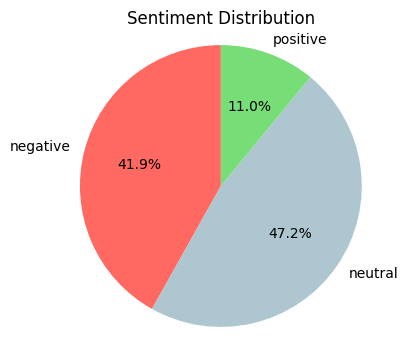

In [60]:
colors = ['#FF6961', '#aec6cf', '#77DD77']

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_count_df['count'], labels=sentiment_count_df['sentiment'], autopct='%1.1f%%', colors=colors, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Sentiment Distribution')
plt.show()

### <font color="blue">F. Perform Emotion Analysis</font>

In [80]:
task2 ='emotion'
MODEL2 = f"cardiffnlp/twitter-roberta-base-{task2}"

tokenizer2 = AutoTokenizer.from_pretrained(MODEL2)

In [81]:
model2 = AutoModelForSequenceClassification.from_pretrained(MODEL2)
model2.save_pretrained(MODEL2)

In [90]:
# download label mapping
mapping_link2 = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task2}/mapping.txt"
with urllib.request.urlopen(mapping_link2) as f:
    html2 = f.read().decode('utf-8').split("\n")
    csvreader2 = csv.reader(html2, delimiter='\t')
labels2 = [row[1] for row in csvreader2 if len(row) > 1]

In [91]:
labels2

['anger', 'joy', 'optimism', 'sadness']

In [92]:
text = "i love you"
text = preprocess(text)
encoded_input = tokenizer(text, return_tensors='pt')
output = model2(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [93]:
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels2[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) joy 0.8182
2) sadness 0.0775
3) optimism 0.0641
4) anger 0.0402


In [97]:
def perform_emotion_analysis(text):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model2(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    l = labels2[ranking[0]]  # Get the label with the highest score
    s = np.round(float(scores[ranking[0]]), 4)
    return l, s

In [98]:
emotion_results = []

for text in tqdm(final_lgbt_df['tweet_clean'], dynamic_ncols=True):
    result = perform_emotion_analysis(text)
    emotion_results.append(result)

final_lgbt_df['emotion'] = emotion_results

100%|██████████| 6491/6491 [07:29<00:00, 14.44it/s]


In [99]:
final_lgbt_df

,tweet,tweet_clean,tweet_no_slang,tweet_no_stopwords,tweet_stemmed,sentiment,confidence,emotion
0,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...,ireland global project against extremism and h...,ireland global hood against extremism and hate...,ireland global project extremism hate desig...,ireland global project extrem hate design anti...,negative,0.6038,"(anger, 0.7637)"
1,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving murder 10 ye...,rapunzel veronica mar surviv murder 10 year to...,negative,0.6702,"(anger, 0.4824)"
2,@moosie5030 @BoogerLeader @stalocksuperfan @Re...,i totally agree with should not be talking or ...,i totally agree with should not be talking or ...,totally agree talking recommending anythi...,total agre talk recommend anyth child without ...,neutral,0.5413,"(anger, 0.4918)"
3,PHANTOMS AND FALLING STARS: A marooned captain...,phantoms and falling a marooned a tribal and a...,phantoms and falling a marooned a tribal and a...,phantoms falling marooned tribal wildling...,phantom fall maroon tribal wildl runaway unit ...,neutral,0.8125,"(sadness, 0.3575)"
4,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...,how about constitutional the right to not have...,how about constitutional the right to not have...,constitutional right fbi come house w ...,constitut right fbi come hous w show warrant r...,neutral,0.6191,"(anger, 0.891)"
...,...,...,...,...,...,...,...,...
6486,@island_xd Sounds like meme culture but lgbt p...,sounds like meme culture but lgbt ppl like me ...,sounds like an idea that spreads like a virus ...,sounds like meme culture lgbt ppl like use l...,sound like meme cultur lgbt ppl like use label...,negative,0.5525,"(sadness, 0.4053)"
6487,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,holidays truly favorite time year many re...,holiday truli favorit time year mani reason pa...,positive,0.9924,"(joy, 0.9615)"
6488,I'm praying to The Flying Spaghetti Monster th...,praying to the flying spaghetti monster that s...,praying to the flying spaghetti monster that s...,praying flying spaghetti monster someday l...,pray fli spaghetti monster someday lgbt activi...,negative,0.7917,"(anger, 0.4991)"
6489,@Tiernanbrady @ionainstitute They literally op...,they literally oppose equal rights for people ...,they literally oppose equal rights for people ...,literally oppose equal rights people irratio...,liter oppos equal right peopl irrat bigot hate...,negative,0.9408,"(anger, 0.9669)"


In [100]:
final_lgbt_df['confidence_emotion'] = final_lgbt_df['emotion'].apply(lambda result: result[1])
final_lgbt_df['emotion'] = final_lgbt_df['emotion'].apply(lambda result: result[0])
final_lgbt_df

,tweet,tweet_clean,tweet_no_slang,tweet_no_stopwords,tweet_stemmed,sentiment,confidence,emotion,confidence_emotion
0,@zachula5 @wokvicc @rayanami @JCCWilliams Irel...,ireland global project against extremism and h...,ireland global hood against extremism and hate...,ireland global project extremism hate desig...,ireland global project extrem hate design anti...,negative,0.6038,anger,0.7637
1,#SFFpit #YA #UF #LGBT Rapunzel + Veronica Mars...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving her murder 10...,rapunzel veronica mars surviving murder 10 ye...,rapunzel veronica mar surviv murder 10 year to...,negative,0.6702,anger,0.4824
2,@moosie5030 @BoogerLeader @stalocksuperfan @Re...,i totally agree with should not be talking or ...,i totally agree with should not be talking or ...,totally agree talking recommending anythi...,total agre talk recommend anyth child without ...,neutral,0.5413,anger,0.4918
3,PHANTOMS AND FALLING STARS: A marooned captain...,phantoms and falling a marooned a tribal and a...,phantoms and falling a marooned a tribal and a...,phantoms falling marooned tribal wildling...,phantom fall maroon tribal wildl runaway unit ...,neutral,0.8125,sadness,0.3575
4,@TruthofSoldiers @BconnectedJ @njoyzgrl81 @Val...,how about constitutional the right to not have...,how about constitutional the right to not have...,constitutional right fbi come house w ...,constitut right fbi come hous w show warrant r...,neutral,0.6191,anger,0.8910
...,...,...,...,...,...,...,...,...,...
6486,@island_xd Sounds like meme culture but lgbt p...,sounds like meme culture but lgbt ppl like me ...,sounds like an idea that spreads like a virus ...,sounds like meme culture lgbt ppl like use l...,sound like meme cultur lgbt ppl like use label...,negative,0.5525,sadness,0.4053
6487,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,the holidays are truly my favorite time of yea...,holidays truly favorite time year many re...,holiday truli favorit time year mani reason pa...,positive,0.9924,joy,0.9615
6488,I'm praying to The Flying Spaghetti Monster th...,praying to the flying spaghetti monster that s...,praying to the flying spaghetti monster that s...,praying flying spaghetti monster someday l...,pray fli spaghetti monster someday lgbt activi...,negative,0.7917,anger,0.4991
6489,@Tiernanbrady @ionainstitute They literally op...,they literally oppose equal rights for people ...,they literally oppose equal rights for people ...,literally oppose equal rights people irratio...,liter oppos equal right peopl irrat bigot hate...,negative,0.9408,anger,0.9669


In [101]:
# Group the original DataFrame by the 'sentiment' column and count the occurrences
emotion_counts = final_lgbt_df['emotion'].value_counts().reset_index()

# Rename the columns for clarity
emotion_counts.columns = ['emotion', 'count']

# Create a new DataFrame with the counts
emotion_count_df = pd.DataFrame(emotion_counts)

# Optional: Sort the DataFrame by sentiment labels
emotion_count_df = emotion_count_df.sort_values(by='emotion')

# Reset the index
emotion_count_df = emotion_count_df.reset_index(drop=True)

emotion_count_df

,emotion,count
0,anger,3492
1,joy,1237
2,optimism,768
3,sadness,994


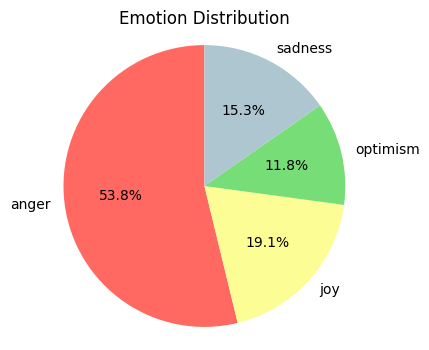

In [120]:
colors = ['#FF6961', '#FDFD96', '#77DD77', '#aec6cf']

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(emotion_count_df['count'], labels=emotion_count_df['emotion'], autopct='%1.1f%%', colors=colors, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Emotion Distribution')
plt.show()

### <font color="blue">G. Perform Word Count Analysis</font>

In [111]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\LENOVO\anaconda3\envs\tensorflow\python.exe -m pip install --upgrade pip


In [112]:
text2 = final_lgbt_df["tweet_no_stopwords"].to_list()
wordcloud_text2 = ''.join(text2)

In [114]:
wordcloud_text2

'ireland global project  extremism  hate  designated    anti lgbt group basedrapunzel veronica mars surviving  murder 10 years   tower taught elaine life hands  lemons paint  hand giving life  middle hunting   life hands   lemons shit goestotally agree     talking  recommending anything     child     without medical even     ever   1  never  like  real momphantoms  falling  marooned  tribal   wildling runaway unite  save  island   havoc   wild peter pan x daughter   pirate king x lord   fliesconstitutional  right     fbi come   house w  showing  warrant  right  know  vote   right  due process   maga book lib media  anti lgbt rightssaid  lmaooo  arguing  lgbt discourse  shit   annoying sickpart  lgbt  entire   burlesque participated   fetish kink community    friends  transitioning people   stages   20 yrs  love   trans harm  gonestop   voting   best   would  vote  someonelgbt media content   warrant higher age  govt takes reference  prevailing mci    bunch  backside fucker  keen   reco

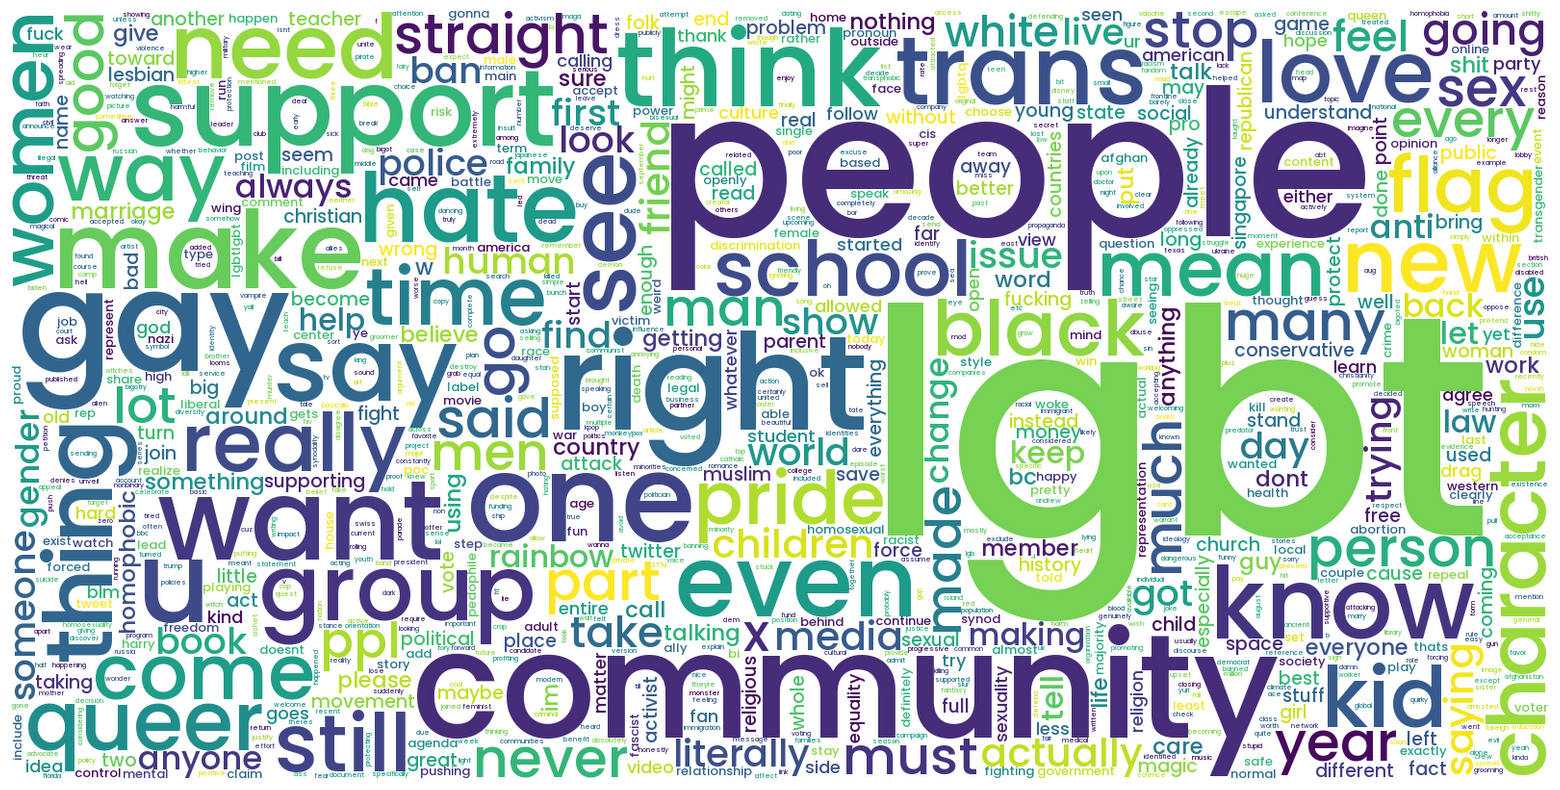

In [115]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      width=1600, height=800,
                        background_color = 'white',
                        font_path="Poppins-Medium.ttf",
                      max_words = 1000,
                      collocations=False).generate(wordcloud_text2)

#plot the wordcloud object
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()

wordcloud.to_file('all.png')

In [119]:
word_count = final_lgbt_df.tweet_no_stopwords.str.split(expand=True).stack().value_counts().reset_index()
word_count.columns = ['Word', 'Frequency'] 
word_count.head(20)

,Word,Frequency
0,lgbt,4394
1,people,1185
2,like,790
3,community,581
4,gay,479
5,one,329
6,get,303
7,think,300
8,rights,294
9,would,274


Didapatkan bahwa kata-kata yang paling sering keluar adalah lgbt, people, dan like.